In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import cufflinks as cf
%matplotlib inline

In [2]:
from plotly.offline import iplot

In [3]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [6]:
df = pd.read_csv('IPL Matches 2008-2020.csv', index_col = 'id', parse_dates=['date'])
df.head()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
id,,,,,,,,,,,,,,,,
335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [8]:
df['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [9]:
df[df['result'] == 'tie']

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
id,,,,,,,,,,,,,,,,
392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney
1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon
1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi


In [11]:
df['winner'].isnull().sum()

4

In [12]:
winlost = df[['team1','team2','winner']]

In [13]:
winlost.head()

,team1,team2,winner
id,,,
335982,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings
335984,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils
335985,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore
335986,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders


In [16]:
winlost['loser'] = winlost.apply(lambda x: (x['team2'] if x['team1'] == x['winner'] else x['team1']), axis = 1)

In [17]:
winlost.head()

,team1,team2,winner,loser
id,,,,
335982,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bangalore
335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Kings XI Punjab
335984,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals
335985,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,Mumbai Indians
335986,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers


In [20]:
wins = winlost['winner'].value_counts()
loses = winlost['loser'].value_counts()

In [21]:
loses

Royal Challengers Bangalore    104
Kings XI Punjab                102
Kolkata Knight Riders           93
Delhi Daredevils                93
Mumbai Indians                  83
Rajasthan Royals                78
Chennai Super Kings             72
Sunrisers Hyderabad             58
Deccan Chargers                 46
Pune Warriors                   33
Gujarat Lions                   17
Delhi Capitals                  14
Rising Pune Supergiants          9
Kochi Tuskers Kerala             8
Rising Pune Supergiant           6
Name: loser, dtype: int64

In [23]:
wins.iplot(kind = 'bar', xTitle= 'Team', yTitle= 'Count', title = 'Winning COunts')

In [24]:
loses.iplot(kind = 'bar', xTitle = 'Loser', yTitle = 'Count', title = 'Loser COunt')

In [26]:
mom = df['player_of_match'].value_counts()
mom

AB de Villiers      23
CH Gayle            22
RG Sharma           18
DA Warner           17
MS Dhoni            17
                    ..
JC Archer            1
DJG Sammy            1
NV Ojha              1
JEC Franklin         1
Mujeeb Ur Rahman     1
Name: player_of_match, Length: 233, dtype: int64

In [28]:
mom[:20].iplot(kind = 'bar', xTitle = 'Player', yTitle = 'Count', title = 'top 20 Man of The Math')

In [31]:
city = df['city'].value_counts()

In [33]:
city[:20].iplot(kind = 'bar')

In [34]:
stadium = df['venue'].value_counts()

In [36]:
stadium[:20].iplot(kind = 'bar')

In [37]:
def get_micsk(team1,team2):
    teams = ['Chennai Super Kings', 'Mumbai Indians']
    if team1 in teams and team2 in teams:
        return True
    else:
        return False

In [38]:
index = []
for row in df.iterrows():
    flag = get_micsk(row[1]['team1'],row[1]['team2'])
    index.append(flag)

In [41]:
sum(index)

30

In [43]:
micsk = df[index]
micsk.head()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
id,,,,,,,,,,,,,,,,
335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
336018,Mumbai,2008-05-14,ST Jayasuriya,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,wickets,9.0,N,NaN,BR Doctrove,AM Saheba
392181,Cape Town,2009-04-18,SR Tendulkar,Newlands,1,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,field,Mumbai Indians,runs,19.0,N,NaN,BR Doctrove,K Hariharan
392227,Port Elizabeth,2009-05-16,ML Hayden,St George's Park,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,SK Tarapore,SJA Taufel
419125,Mumbai,2010-03-25,SR Tendulkar,Brabourne Stadium,0,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,wickets,5.0,N,NaN,BF Bowden,AM Saheba


In [44]:
micsk['toss_decision'].value_counts().iplot(kind = 'bar')

In [45]:
micsk['toss_winner'].value_counts().iplot(kind = 'bar')

In [46]:
micsk['winner'].value_counts().iplot(kind = 'bar')

In [48]:
micsk['player_of_match'].value_counts().iplot(kind = 'bar')

In [50]:
temp = micsk[['winner','result','result_margin']]

In [53]:
temp = temp.set_index('winner')
temp.max()

result           wickets
result_margin         60
dtype: object

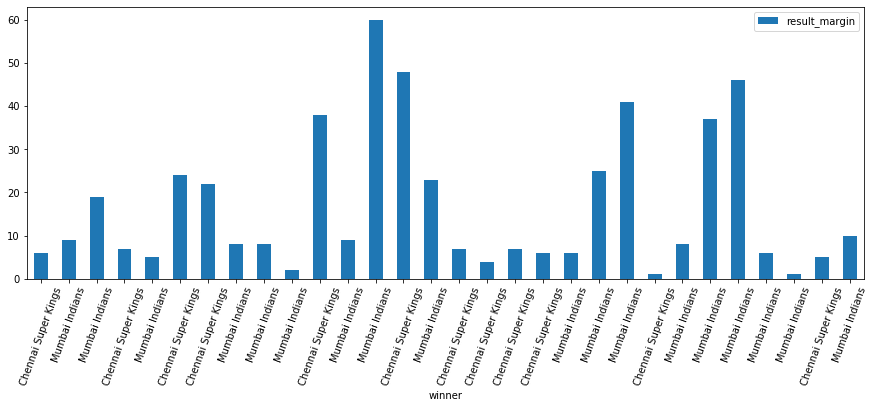

In [59]:
temp.plot.bar(figsize = (15,5), rot = 70)

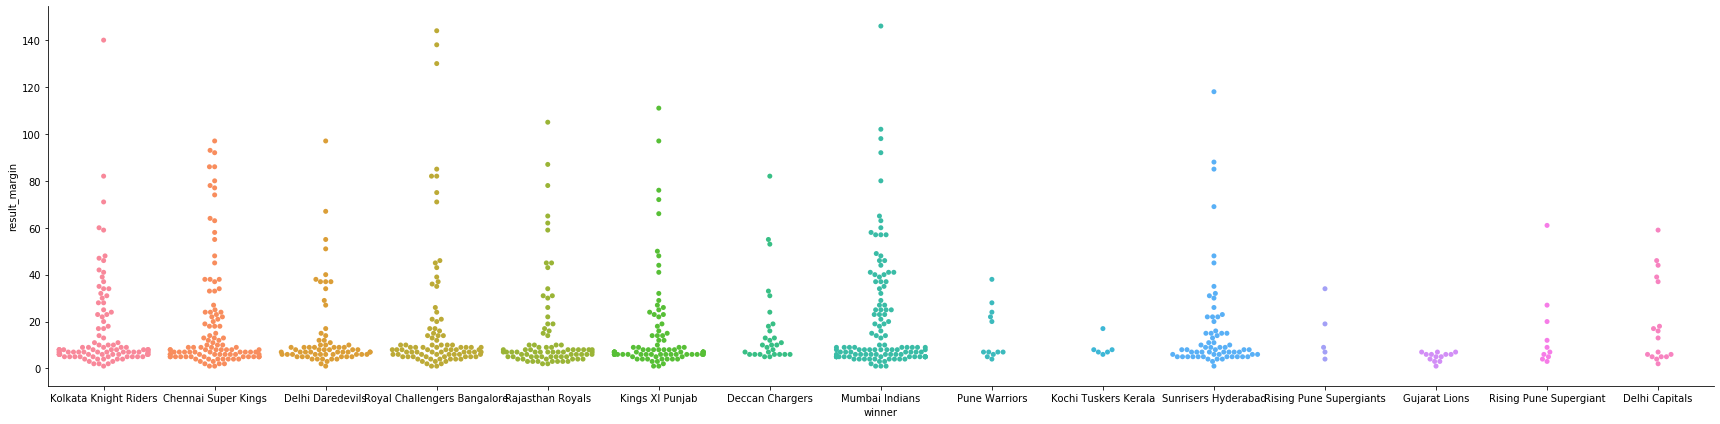

In [72]:
sns.catplot(x= 'winner', y = 'result_margin', data = df, kind = 'swarm',height = 6, aspect = 4)

### Ball by ball analysis

In [76]:
df = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv',index_col = 'id')
df.head()

,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
id,,,,,,,,,,,,,,,,,
335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [78]:
df['batsman'].value_counts()[:20].iplot(kind = 'bar')

In [79]:
df['bowler'].value_counts()[:20].iplot(kind = 'bar')

In [80]:
df['non_striker'].value_counts()[:20].iplot(kind = 'bar')

In [82]:
df.columns


Index(['inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [84]:
runs = df.groupby('batting_team').sum()[['batsman_runs', 'total_runs']]

In [85]:
runs

,batsman_runs,total_runs
batting_team,,
Chennai Super Kings,26953,28363
Deccan Chargers,10885,11463
Delhi Capitals,5074,5296
Delhi Daredevils,23011,24285
Gujarat Lions,4627,4856
Kings XI Punjab,28496,30017
Kochi Tuskers Kerala,1758,1901
Kolkata Knight Riders,27766,29383
Mumbai Indians,30547,32286


In [86]:
runs.iplot(kind = 'bar')

In [92]:
batsman = df.groupby('batsman')['batsman_runs'].sum()
batsman = batsman.sort_values(ascending=False)
batsman

batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
                  ... 
Sunny Gupta          0
C Nanda              0
U Kaul               0
Arshdeep Singh       0
IC Pandey            0
Name: batsman_runs, Length: 537, dtype: int64

In [93]:
batsman[:20].iplot(kind = 'bar')

In [95]:
df['player_dismissed'].value_counts()[:20].iplot(kind = 'bar')

In [99]:
df['dismissal_kind'].value_counts()

caught                   5743
bowled                   1700
run out                   893
lbw                       571
stumped                   294
caught and bowled         269
hit wicket                 12
retired hurt               11
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [98]:
df['dismissal_kind'].value_counts().iplot(kind = 'bar')